<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подбор-моделей" data-toc-modified-id="Подбор-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подбор моделей</a></span></li></ul></li><li><span><a href="#Улучшение-моделей" data-toc-modified-id="Улучшение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Улучшение моделей</a></span><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Подбор-порога" data-toc-modified-id="Подбор-порога-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подбор порога</a></span></li><li><span><a href="#Настройка-гиперпараметров" data-toc-modified-id="Настройка-гиперпараметров-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Настройка гиперпараметров</a></span></li><li><span><a href="#Тест-моделей" data-toc-modified-id="Тест-моделей-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тест моделей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li></ul></div>

# Отток клиентов

Дано: отток клиентов банка. 

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Задача: построить модель с предельно большим значением *F1*-меры. Минимальное значение для решения задачи - 0.55 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

**Необходимые для проекта импорты**

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import Pool, cv
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

**Изучение датасета**

In [3]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Наблюдаем пропуски в столбце tenure. Решим в дальнейшем, что с ними делать - здесь имеет место быть либо технические особенности (например, если клиент в банке менее 1 года - ставится NaN) - так или иначе, восстановить по другим признакам данные мы не можем.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Признаки:**

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Таргет:**
- Exited — факт ухода клиента

In [7]:
df['Exited'].value_counts().to_frame()

,Exited
0,7963
1,2037


In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

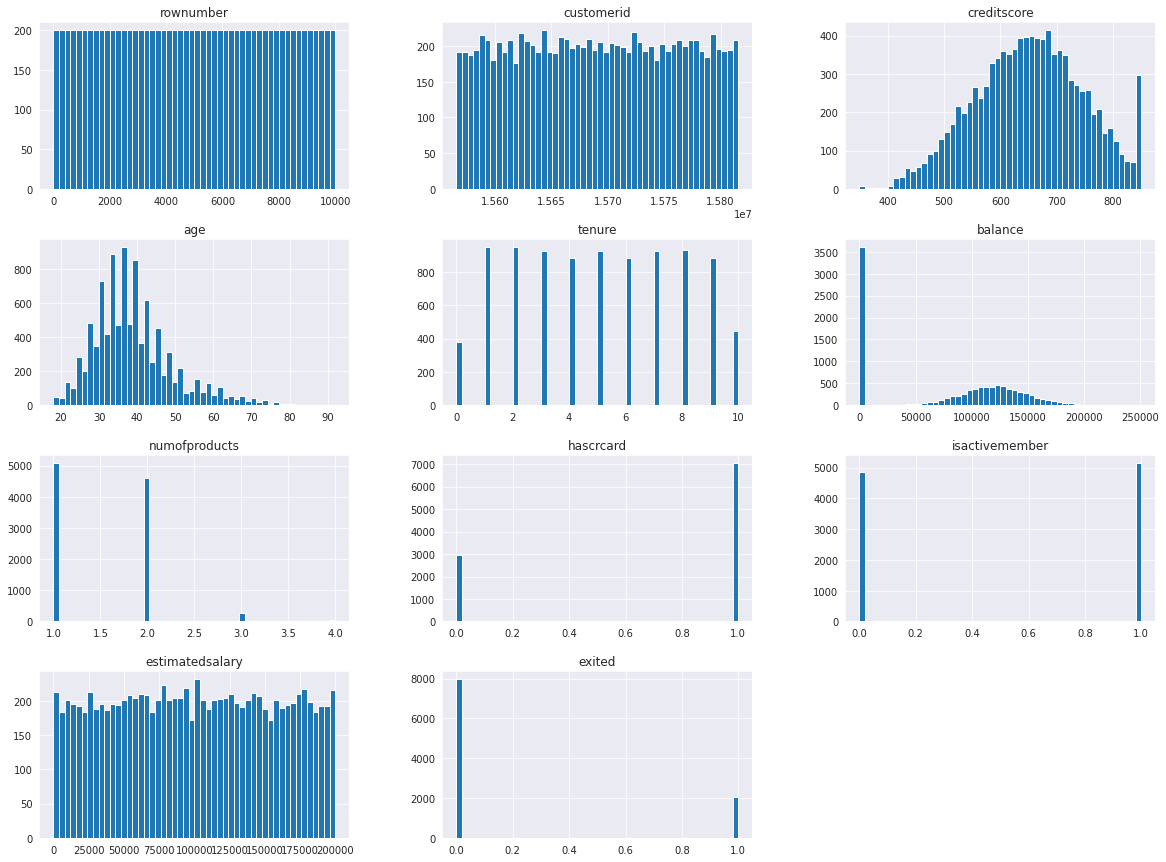

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

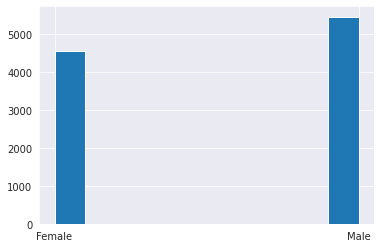

In [10]:
df['gender'].hist()
plt.show()

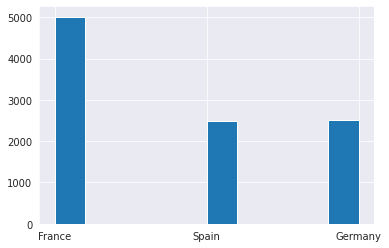

In [11]:
df['geography'].hist()
plt.show()

**Проверка на дупликаты**

In [12]:
mydups = df.duplicated().sum()
print('Количество полных дубликтов в датасете', mydups)

Количество полных дубликтов в датасете 0


**Пропуски**

In [13]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('bwr')

,0
rownumber,0.000000
customerid,0.000000
surname,0.000000
creditscore,0.000000
geography,0.000000
gender,0.000000
age,0.000000
tenure,9.100000
balance,0.000000
numofproducts,0.000000


**Таргет**

In [14]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [15]:
df[(df['tenure'].isna() == True)]['numofproducts'].value_counts().to_frame()

,numofproducts
1,467
2,406
3,32
4,4


In [16]:
print('Доля ушедших клиентов', df['exited'].mean())

Доля ушедших клиентов 0.2037


Мы предварительно рассмотрели наш сет данных:

- пропуски обнаружены в одном столбце tenure - заменили на 0, необходимо уточнить причину появления
- дубликатов не обнаружено, удалять строки не требуется
- в процессе подготовки признаков для анализа - удалим столбцы customer_id, row_number и surname


In [17]:
df

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## Исследование задачи

Очистим датасет от столбцов, которые малополезны для анализа.

In [18]:
data = df.drop(['rownumber', 'customerid', 'surname'], axis=1).copy()
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Категориальная переменная - пол**

In [19]:
data['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

**Категориальная переменная - страна проживания**

In [20]:
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [21]:
data['tenure'].value_counts(dropna=False) 

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

Предположим, что пропуски в данном столбце это новые клиенты со стажем до года. Заменим на 0.

In [22]:
data['tenure'] = data['tenure'].fillna(0).astype('int64')

In [23]:
data.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

**One-hot Encoding**

In [24]:
# проведем кодирования двух признаков
gender_ohe = pd.get_dummies(df["gender"], drop_first=True)
country_ohe = pd.get_dummies(df["geography"], drop_first=True)

#удалим категориальные признаки
data.drop(["gender", "geography"], axis=1,  inplace=True)

#объединим новые столбцы
df_ohe = pd.concat([data, gender_ohe, country_ohe], axis=1)

df_ohe.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Разделение выборки.**

In [25]:
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

In [26]:
features, target = split_data(df_ohe,'exited')

In [27]:
features_df, features_valid, target_df, target_valid = ( 
                                train_test_split(
                                features, target, test_size=0.20, random_state=1589)
)
features_train, features_test, target_train, target_test = ( 
                                train_test_split(
                                features_df, target_df, test_size=0.25, random_state=1589)
)

In [28]:
print('Количество образцов обучающей выборки:', len(features_train))
print('Количество образцов валидационной выборки:', len(features_valid))
print('Количество образцов тестовой выборки:', len(features_test))
print('Сумма выборок:', len(features_train) + len(features_test) + len(features_test))
print()
print('Количество образцов подготовленной выборки (контрольная сумма):', len(df_ohe))

Количество образцов обучающей выборки: 6000
Количество образцов валидационной выборки: 2000
Количество образцов тестовой выборки: 2000
Сумма выборок: 10000

Количество образцов подготовленной выборки (контрольная сумма): 10000


In [29]:
features_df.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'Male', 'Germany', 'Spain'],
      dtype='object')

**Стандартизация**

In [30]:
numeric = ['creditscore', 'age', 'balance', 'estimatedsalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,Male,Germany,Spain
4770,-0.371823,-1.894506,5,-1.231292,2,1,0,1.027345,1,0,1
4816,-0.526749,-0.945798,8,-1.231292,2,0,1,-1.150551,1,0,0
473,1.384000,-1.040669,0,-1.231292,2,1,0,-0.411374,1,0,0
3340,0.805611,-0.945798,0,0.534116,1,1,1,-1.310604,1,1,0
1992,-0.392480,-0.945798,6,1.757978,2,1,1,-0.411184,0,0,0


In [31]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,Male,Germany,Spain
1509,-1.270392,-0.186832,6,0.439081,1,1,0,1.674434,1,0,0
6883,0.413133,-0.850928,9,-1.231292,1,1,0,-0.892235,1,0,0
8799,-2.034691,-0.471444,4,-1.231292,2,1,0,1.704112,1,0,0
9166,-0.247883,-0.376574,2,0.987658,1,1,1,1.242193,0,1,0
9227,1.291045,-0.756057,5,-1.231292,2,1,0,-0.143139,0,0,0


In [32]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,Male,Germany,Spain
2033,0.144596,0.192651,8,-1.231292,2,1,0,0.544199,1,0,1
3458,1.229075,-0.186832,9,-1.231292,2,0,0,-1.359978,0,0,0
6049,-0.609376,0.192651,0,-1.231292,2,1,0,-0.608421,1,0,1
5709,-0.072300,0.002909,9,-1.231292,1,1,0,-1.690034,0,0,0
2704,0.691999,-1.135540,2,-1.231292,2,0,0,-1.298759,1,0,0


### Подбор моделей

**Случайный лес**

In [33]:
model = RandomForestClassifier(random_state=1589, n_estimators=10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5445705024311183


Попробуем установить параметр class_weight

In [34]:
model = RandomForestClassifier(random_state=1589, n_estimators=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5163398692810458


Показатель F1 ухудшился.

**Логистическая регрессия**

In [35]:
model = LogisticRegression(random_state=1589, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3303085299455536


In [36]:
model = LogisticRegression(random_state=1589, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5013286093888397


Балансировка классов позволила увеличить F1 почти в два раза.

**Catboost**

In [37]:
model = CatBoostClassifier(verbose=100, random_state=1589)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Learning rate set to 0.022141
0:	learn: 0.6770168	total: 49.6ms	remaining: 49.6s
100:	learn: 0.3319145	total: 264ms	remaining: 2.35s
200:	learn: 0.3064607	total: 481ms	remaining: 1.91s
300:	learn: 0.2915482	total: 695ms	remaining: 1.61s
400:	learn: 0.2791969	total: 916ms	remaining: 1.37s
500:	learn: 0.2678517	total: 1.14s	remaining: 1.14s
600:	learn: 0.2571642	total: 1.36s	remaining: 900ms
700:	learn: 0.2477392	total: 1.58s	remaining: 674ms
800:	learn: 0.2383122	total: 1.81s	remaining: 451ms
900:	learn: 0.2303955	total: 2.02s	remaining: 223ms
999:	learn: 0.2228253	total: 2.24s	remaining: 0us
F1: 0.5873261205564142


Catboost сходу демонстрирует лучшие показатели в сравнении с другими рассматриваемыми моделями.

Поставлена задача классификации. 
Для того, чтобы улучшить результаты прогнозирования и облегчить обучение модели, были преобразованы данные:

- удалили лишние признаки - такие как фамилия, id клиента и номер строки
- провели кодирование категорийных переменных
- провели масштабирование количетвенных переменных
- разделили выборки в соотношении 60%:20%:20% - обучающую, валидационную для подбора гиперпараметров и проверке модели, тестовую - для итоговой проверки модели и проведении оценки
- Попробовали обучить модели на объектах с дисбалансом классов

## Улучшение моделей

### Upsampling

In [38]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

    
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

print(features_upsampled.shape)
print(target_upsampled.shape)

(10916, 11)
(10916,)


**Логистическая регрессия**

In [39]:
model = LogisticRegression(random_state=1529, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5011494252873563


Показатель F1 на том же уровне, что и показатель модели с параметром баланса классов.

**Случайный лес**

In [40]:
model = RandomForestClassifier(random_state=1589, n_estimators=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.608695652173913


Значительное улучшение показателя F1.

**Catboost**

In [41]:
model = CatBoostClassifier(verbose=100, random_state=1589)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Learning rate set to 0.028588
0:	learn: 0.6772501	total: 4.83ms	remaining: 4.82s
100:	learn: 0.4197333	total: 383ms	remaining: 3.4s
200:	learn: 0.3816198	total: 790ms	remaining: 3.14s
300:	learn: 0.3539000	total: 1.17s	remaining: 2.72s
400:	learn: 0.3287711	total: 1.56s	remaining: 2.33s
500:	learn: 0.3075927	total: 1.93s	remaining: 1.93s
600:	learn: 0.2882717	total: 2.35s	remaining: 1.56s
700:	learn: 0.2717396	total: 2.73s	remaining: 1.16s
800:	learn: 0.2562649	total: 3.15s	remaining: 784ms
900:	learn: 0.2417487	total: 3.56s	remaining: 391ms
999:	learn: 0.2280442	total: 3.94s	remaining: 0us
F1: 0.6143790849673203


Показатель подрос.

**Вывод**: техника Upsample позволила улучшить показатели всех моделей за счёт увеличения количества целевого класса до уровня нецелевого класса.

### Downsampling

In [42]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_sample = features_zeros.sample(frac=0.1, random_state=12345)
    target_sample = target_zeros.sample(frac=0.1, random_state=12345)
    
    features_downsampled = pd.concat([features_sample] + [features_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)
    

    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

print(features_downsampled.shape)
print(target_downsampled.shape)

(1706, 11)
(1706,)


**Логистическая регрессия**

In [43]:
model = LogisticRegression(random_state=1589, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.41163556531284295


**Случайный лес**

In [44]:
model = RandomForestClassifier(random_state=1589, n_estimators=10)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4910522548317824


**Catboost**

In [45]:
model = CatBoostClassifier(verbose=100, random_state=1589)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Learning rate set to 0.012942
0:	learn: 0.6875072	total: 1.67ms	remaining: 1.67s
100:	learn: 0.4225220	total: 149ms	remaining: 1.32s
200:	learn: 0.3726834	total: 282ms	remaining: 1.12s
300:	learn: 0.3441045	total: 414ms	remaining: 961ms
400:	learn: 0.3236211	total: 541ms	remaining: 808ms
500:	learn: 0.3049910	total: 698ms	remaining: 695ms
600:	learn: 0.2883139	total: 867ms	remaining: 576ms
700:	learn: 0.2733251	total: 1.01s	remaining: 433ms
800:	learn: 0.2604211	total: 1.15s	remaining: 286ms
900:	learn: 0.2476842	total: 1.29s	remaining: 142ms
999:	learn: 0.2351627	total: 1.45s	remaining: 0us
F1: 0.501023890784983


**Вывод**: техника downsampling привела к ухудшению показателей всех моделей, по сравнению с техникой upsampling.

### Подбор порога

**Логистическая регрессия**

Порог = 0.00 | Точность = 0.202, Полнота = 1.000 | F1-мера = 0.336
Порог = 0.05 | Точность = 0.225, Полнота = 0.975 | F1-мера = 0.366
Порог = 0.10 | Точность = 0.279, Полнота = 0.913 | F1-мера = 0.428
Порог = 0.15 | Точность = 0.332, Полнота = 0.834 | F1-мера = 0.475
Порог = 0.20 | Точность = 0.381, Полнота = 0.725 | F1-мера = 0.499
Порог = 0.25 | Точность = 0.428, Полнота = 0.594 | F1-мера = 0.497
Порог = 0.30 | Точность = 0.489, Полнота = 0.510 | F1-мера = 0.499
Порог = 0.35 | Точность = 0.534, Полнота = 0.431 | F1-мера = 0.477
Порог = 0.40 | Точность = 0.546, Полнота = 0.337 | F1-мера = 0.417
Порог = 0.45 | Точность = 0.583, Полнота = 0.277 | F1-мера = 0.376
Порог = 0.50 | Точность = 0.619, Полнота = 0.225 | F1-мера = 0.330
Порог = 0.55 | Точность = 0.643, Полнота = 0.178 | F1-мера = 0.279
Порог = 0.60 | Точность = 0.691, Полнота = 0.139 | F1-мера = 0.231
Порог = 0.65 | Точность = 0.700, Полнота = 0.087 | F1-мера = 0.154
Порог = 0.70 | Точность = 0.688, Полнота = 0.054 | F1-мера = 0

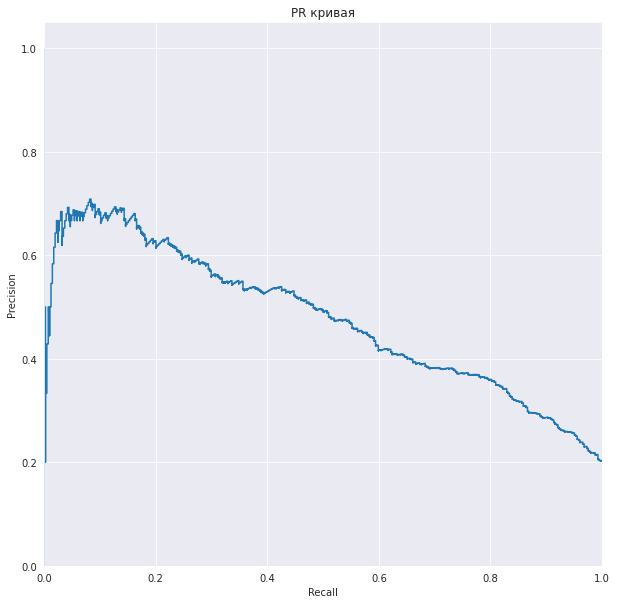

In [46]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR кривая')
plt.show() 

Для порога 0 полнота равна 1 - все ответы положительные. При пороге 0.85 модель перестает давать правильные ответы. 

**Случайный лес**

Порог = 0.00 | Точность = 0.284, Полнота = 0.886 | F1-мера = 0.430
Порог = 0.05 | Точность = 0.284, Полнота = 0.886 | F1-мера = 0.430
Порог = 0.10 | Точность = 0.377, Полнота = 0.792 | F1-мера = 0.511
Порог = 0.15 | Точность = 0.377, Полнота = 0.792 | F1-мера = 0.511
Порог = 0.20 | Точность = 0.475, Полнота = 0.688 | F1-мера = 0.562
Порог = 0.25 | Точность = 0.475, Полнота = 0.688 | F1-мера = 0.562
Порог = 0.30 | Точность = 0.564, Полнота = 0.587 | F1-мера = 0.575
Порог = 0.35 | Точность = 0.564, Полнота = 0.587 | F1-мера = 0.575
Порог = 0.40 | Точность = 0.677, Полнота = 0.498 | F1-мера = 0.573
Порог = 0.45 | Точность = 0.677, Полнота = 0.498 | F1-мера = 0.573
Порог = 0.50 | Точность = 0.789, Полнота = 0.416 | F1-мера = 0.545
Порог = 0.55 | Точность = 0.789, Полнота = 0.416 | F1-мера = 0.545
Порог = 0.60 | Точность = 0.841, Полнота = 0.354 | F1-мера = 0.498
Порог = 0.65 | Точность = 0.841, Полнота = 0.354 | F1-мера = 0.498
Порог = 0.70 | Точность = 0.876, Полнота = 0.280 | F1-мера = 0

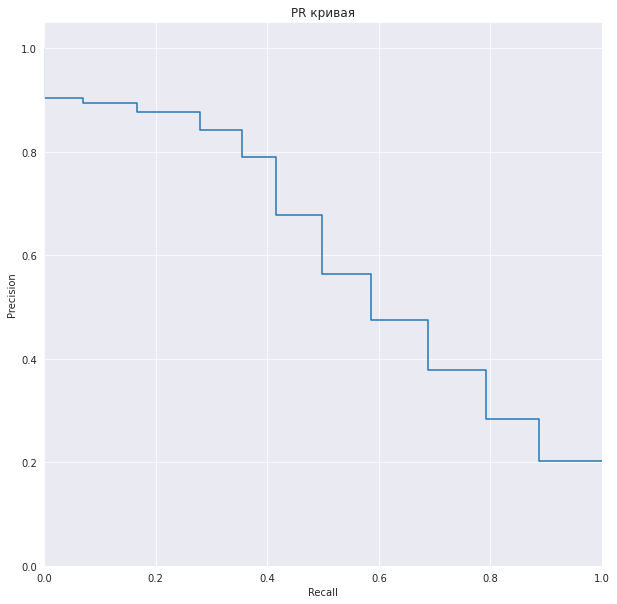

In [47]:
model = RandomForestClassifier(random_state=1589, n_estimators=10)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR кривая')
plt.show() 

Самый высокий показатель достигаем при пороге 0.3

**Catboost**

Learning rate set to 0.022141
0:	learn: 0.6770168	total: 2.5ms	remaining: 2.5s
100:	learn: 0.3319145	total: 223ms	remaining: 1.99s
200:	learn: 0.3064607	total: 438ms	remaining: 1.74s
300:	learn: 0.2915482	total: 652ms	remaining: 1.51s
400:	learn: 0.2791969	total: 899ms	remaining: 1.34s
500:	learn: 0.2678517	total: 1.11s	remaining: 1.11s
600:	learn: 0.2571642	total: 1.34s	remaining: 889ms
700:	learn: 0.2477392	total: 1.55s	remaining: 664ms
800:	learn: 0.2383122	total: 1.78s	remaining: 442ms
900:	learn: 0.2303955	total: 2s	remaining: 219ms
999:	learn: 0.2228253	total: 2.2s	remaining: 0us
Порог = 0.00 | Точность = 0.202, Полнота = 1.000 | F1-мера = 0.336
Порог = 0.05 | Точность = 0.310, Полнота = 0.955 | F1-мера = 0.468
Порог = 0.10 | Точность = 0.397, Полнота = 0.879 | F1-мера = 0.547
Порог = 0.15 | Точность = 0.467, Полнота = 0.797 | F1-мера = 0.589
Порог = 0.20 | Точность = 0.524, Полнота = 0.738 | F1-мера = 0.613
Порог = 0.25 | Точность = 0.578, Полнота = 0.698 | F1-мера = 0.632
Порог

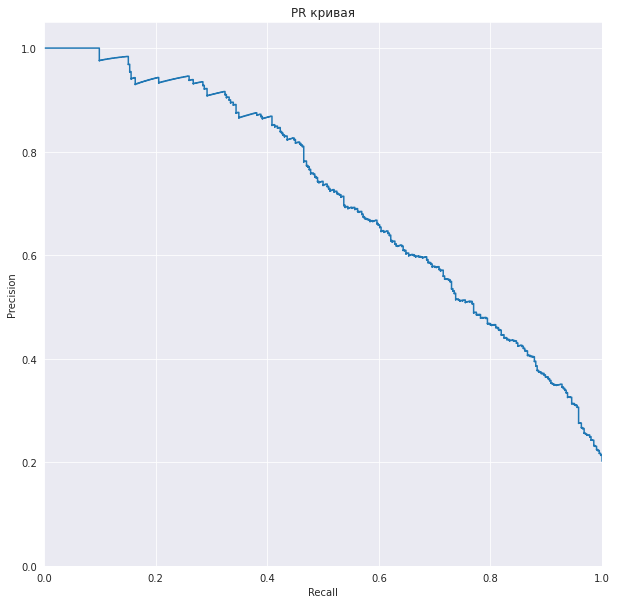

In [48]:
model = CatBoostClassifier(verbose=100, random_state=1589)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR кривая')
plt.show() 

Лучший показатель при пороге 0.25

Остановимся на upsampling, обучим наши модели и подберем гиперпараметры.  

### Настройка гиперпараметров

Обучать модели будем на увеличенной выборке, проверять параметры будем на валидационной выборке и оценивать по F1-мере.

**Логистическая регрессия**

In [49]:
par_grid_logist = {
                   'intercept_scaling': [0.5, 1.0, 1.5],
                   'class_weight': [None, 'balanced'],
                   'C': [0.5, 1, 1.5]
                   }
model = LogisticRegression(solver='liblinear',random_state=1589)

grid_search = GridSearchCV(model, par_grid_logist, cv=5,
                           scoring='f1')
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=1589,
                                          solver='liblinear'),
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': [None, 'balanced'],
                         'intercept_scaling': [0.5, 1.0, 1.5]},
             scoring='f1')

In [50]:
grid_search.best_params_

{'C': 0.5, 'class_weight': None, 'intercept_scaling': 0.5}

In [51]:
model_lreg = LogisticRegression(C=0.5, class_weight=None, intercept_scaling=0.5,
                                solver='liblinear', random_state=1589
)
model_lreg.fit(features_upsampled, target_upsampled)
predicted_valid = model_lreg.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5003837298541827


Итоговое значение ниже целевого минимума на валидационной выборке.

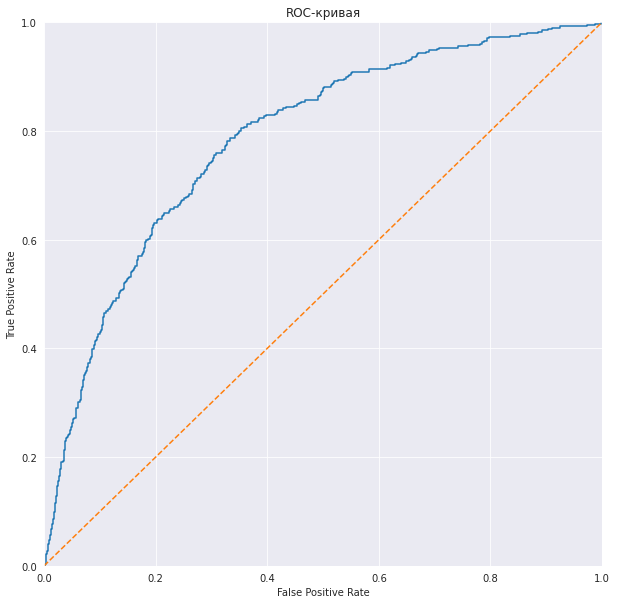

AUC: 0.7852629717859003


In [52]:
probabilities_valid = model_lreg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

**Случайный лес**

In [53]:
par_grid_ensemble = {'n_estimators': [3, 10, 30],
                     'criterion': ['gini', 'entropy'],
                     'min_samples_split': range(5, 15)
                    }
model = RandomForestClassifier(random_state=1589)

grid_search = GridSearchCV(model, par_grid_ensemble, cv=5,
                           scoring='accuracy'
                          )
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1589),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(5, 15),
                         'n_estimators': [3, 10, 30]},
             scoring='accuracy')

In [54]:
grid_search.best_params_

{'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 30}

In [55]:
model_rfc = RandomForestClassifier(random_state=1589, criterion='entropy', 
                               min_samples_split=5, n_estimators=30
                              )
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid = model_rfc.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5945205479452055


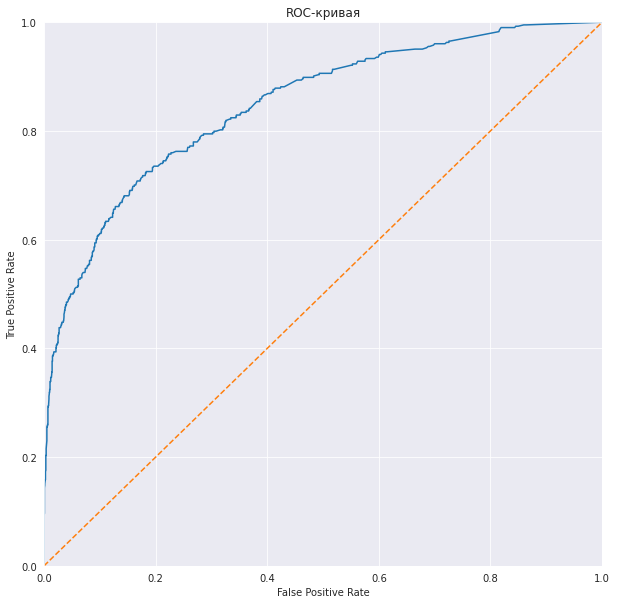

AUC: 0.8469177274870343


In [56]:
probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

**Catboost + СV**

In [57]:
model_cat = CatBoostClassifier(
                           custom_loss=['F1'],
                           random_seed=1589,
                           logging_level='Silent'
)
model_cat.fit(
          features_train, target_train,
          eval_set=(features_valid, target_valid)

)

In [58]:
cv_params = model_cat.get_params()
cv_params.update({
                 'loss_function': 'Logloss'
})
cv_data = cv(
             Pool(features_train, target_train),
             cv_params
)

In [59]:
print('Точная F1-мера: {}'.format(np.max(cv_data['test-F1-mean'])))

Точная F1-мера: 0.6164757298962341


**Итог:** Случайный лес и Catboost показали приемлимые результаты на валидационной выборке. Посмотрим, что они покажут на тесте.

### Тест моделей

In [60]:
#для удобства вывода в дальнейшем - соберем показатели в списки

table_of_model = []
table_of_prec = []
table_of_acc = []

**Логистическая регрессия**

In [61]:
predictions_test = model_lreg.predict(features_test)
test_f1 = f1_score(target_test, predictions_test)
test_acc = accuracy_score(target_test, predictions_test)

print("Accuracy")
print("Тестовая выборка:", test_acc)
print("F1-мера")
print("Тестовая выборка:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('LogisticRegression')

Accuracy
Тестовая выборка: 0.655
F1-мера
Тестовая выборка: 0.4659442724458204


**Случайный лес**

In [62]:
predictions_test = model_rfc.predict(features_test)
test_f1 = f1_score(target_test, predictions_test)
test_acc = accuracy_score(target_test, predictions_test)

print("Accuracy")
print("Тестовая выборка:", test_acc)
print("F1-мера")
print("Тестовая выборка:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('RandomForestClassifier')

Accuracy
Тестовая выборка: 0.837
F1-мера
Тестовая выборка: 0.5664893617021277


**Catboost**

In [63]:
predictions = model_cat.predict(features_test)
test_f1 = f1_score(target_test, predictions_test)
test_acc = accuracy_score(target_test, predictions_test)

print("Accuracy")
print("Тестовая выборка:", test_acc)
print("F1-мера")
print("Тестовая выборка:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('Catboost')

Accuracy
Тестовая выборка: 0.837
F1-мера
Тестовая выборка: 0.5664893617021277


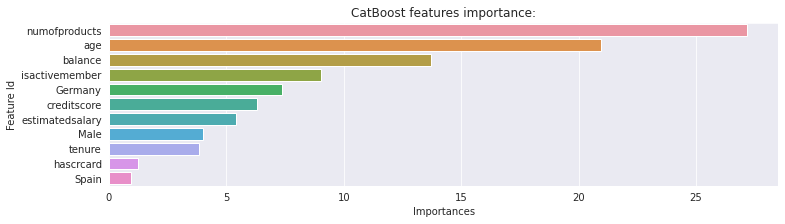

In [64]:
fi = model_cat.get_feature_importance(prettified=True)

plt.figure(figsize=(12, 3));
sns.barplot(x="Importances", y="Feature Id", data=fi);
plt.title('CatBoost features importance:');

## Вывод

In [65]:
table_of_models = (pd.DataFrame({'Model':table_of_model, 'Accuracy':table_of_acc, 
                                'F1 score':table_of_prec}).sort_values(by='F1 score', ascending=False).
                  reset_index(drop=True))
table_of_models['Порог тестирования'] = (
                   table_of_models['F1 score'].apply(lambda x: 'Прошла тест' if x>0.55 else 'Не прошла тест')
)
table_of_models

,Model,Accuracy,F1 score,Порог тестирования
0,RandomForestClassifier,0.84,0.57,Прошла тест
1,Catboost,0.84,0.57,Прошла тест
2,LogisticRegression,0.66,0.47,Не прошла тест


Наилучший результат получили на Случайном лесе и Catboost- 0.57.  
Логистическая регрессия не прошла заявленный порог допустимости.

### Проверка модели на адекватность

Константное сравнение

In [66]:
target_const = target*0
acc_const = accuracy_score(target, target_const)


print("Accuracy")
print("Константа:", acc_const)

Accuracy
Константа: 0.7963


**Случайный лес и Catboost прошли проверку на адекватность**. Правильность моделей выше, чем у случайной.

**Были изучены исторические данные о поведении клиентов и расторжении договоров с банком.
На основе этих данных были определены признаки для обучения модели с целью прогнозирования оттока клиентов. 
Лучших результаты достигнуты на моделях - Случайный Лес и Catboost.**